# Individual Assignment A2

This assessment is marked out of 50 and comprises 50% of the final course mark.

Due by 23:59 on Friday 11th of December 2020, to be submitted via email to m.pereyra@hw.ac.uk.

### Academic misconduct

The assessment is primarily summative in nature. You are expected to be aware of and abide by University policies on academic misconduct.

- [School of Mathematics academic misconduct advice and policies](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)
- [Academic Services academic misconduct information](https://www.ed.ac.uk/academic-services/students/conduct/academic-misconduct)

**This is an individual assignment - do not copy the work of another student.**

If you use any resources (e.g. textbooks or websites) then include appropriate references in your solutions. Course materials do not need to be referenced, but you should clearly state which results you are using.


### Code commentary

Your code should be extensively commented, with the functionality of each line of code explained with a comment. This is to test your understanding of the code you have written. Up to half of the marks associated with the coding part of a question may be deducted for a missing, incomplete, or inaccurate code commentary.

Your comments should explain what the code does, as well as why it does it.

The following provides an example of the expected level of commenting.

In [ ]:
def is_prime(n):
    """
    Return whether an input positive integer is prime.
    """
    
    if n == 1:        # If n is 1 ...
        return False  # ... then n is not prime
    
    for i in range(2, n):  # Test integers i from 2 to n - 1 inclusive
        if n % i == 0:     # If n is divisible by i ...
            return False   # ... then n is not prime
    # If n is not divisible by any integers from 2 to n - 1 inclusive then n is
    # prime
    return True

### Output 

Your code must generate and display all relevant output when run. Rerun your code cells after editing your code, to make sure that the output is updated.

### Markdown cells

You can enter your answers to theoretical questions in the Markdown cells provided in this notebook. To start editing the cell, press shift+enter or double click on it. You can use basic Latex. To render the cell, press shift+enter or run.

Alternatively, you can submit a pdf of your hand-written and scanned in answers to the email above, alongside this notebook.

# Question 1: Comparing RWM and MALA for a simple Gaussian mixture model


Consider a random variable $\textbf{X}$ with probability density function
$$
\pi(\mathbf{x})=\frac{1}{2(2\pi)^{d/2}} \left(\exp\{-0.5\|\mathbf{x}-\mathbf{a}\|_2^2\} + \exp\{-0.5\|\mathbf{x}+\mathbf{a}\|_2^2\}\right), \quad \mathbf{x} \in \mathbb{R}^{d}\, ,
$$
with respect to the Lebesgue measure on $\mathbb{R}^{d}$, and where the elements of $\textbf{a} \in \mathbb{R}^d$ are to $a_j = 1/\sqrt{2d}$ for all $j = 1,\ldots,d$.

### 1.1

State the expression of the iterates of the Random Walk Metropolis Algorithm to generate samples from $\pi$

*Enter your solution here*

In order to implement the Random Walk Metropolis algorithm, we first need to choose an initial state, $x^{(1)}$ with non-zero probability density, $\pi(x^{(1)}) > 0$. Then, we generate iterates, $x^{(i+1)}$ by sampling from the density: 

\begin{equation}
q(x^{(i+1)}|x^{(i)}) = \mathcal{N}(x^{(i)}, \beta^2I)
\end{equation}

for some step-size, $\beta$.
This is a random walk as each iterate can also be generated using the random walk proposal:

$$x^{(i+1)} = x^{(i)} + \beta\zeta_i$$

where $\zeta_i \sim \mathcal{N}(0, I)$. It is more obvious why $\beta$ is a step-size parameter when the random walk iterate is expressed in this form. This form follows naturally from the definition of $q(x^{(i+1)}|x^{(i)})$ above as we just shift the mean and scale the variance of $\zeta_i \sim \mathcal{N}(0, I)$ such that the iterate $x^{(i+1)} \sim \mathcal{N}(x^{(i)}, \beta^2I)$. 

Now that we have a proposal probability density for generating proposals for our iterates, we need to compute an expression for the acceptance probability in the Random Walk Metropolis algorithm. To do this, we should note that $q(x^{(i+1)}|x^{(i)}) = q(x^{(i)}|x^{(i+1)})$. A nice intuitive way to see this is to note that the distribution $\mathcal{N}(0, I)$ is symmetric about 0, so that the probability of sampling $\zeta_i$ equals to the probability of sampling $-\zeta_i$. Thus, the proposal probability densities cancel in the usual Metropolis-Hasting acceptance probability, so we accept the sample $x^{(i+1)}$ with probability:

$$\alpha(x^{(i+1)}|x^{(i)}) = \min\left( 1, \frac{\pi(x^{(i+1)})}{\pi(x^{(i)})} \right)$$

Thus, we perform the Random Walk Metropolis algorithm by iteratively proposing the next iterate according to the equation for $x^{(i+1)}$ above, and then accepting this proposal with probability $\alpha(x^{(i+1)}|x^{(i)})$. 

### 1.2

Write down a first order stochastic differential equation that is ergodic with respect to $\pi$. Explain how this can be incorporated into a proposal such that you obtain the Metropolis Adjusted Langevin Algorithm (MALA)  and state the expression of the its iterates.

*Enter your solution here*

The Langevin stochastic differential equation is a first order SDE which is ergodic with respect to $\pi$:

$$dX = \nabla{\log{\pi(X)}}dt + \sqrt{2}dW$$

where $W(t)$ is a standard $d$-dimensional Brownian motion random variable, such that $W(t_{i+1}) - W(t_{i}) \sim \mathcal{N}(0,t_{i+1}-t_{i}) = \mathcal{N}(0,\beta)$. The ergodicity of this SDE with respect to $\pi$ is proved in the notes, by showing that $\frac{\partial\pi}{\partial t} = 0$ by using the first Fokker Planck equation. In order to write this Langevin SDE more explicity, we need to calculate $\nabla{\log{\pi(\mathbf{x})}}$:

\begin{align}
    \log{\pi(\mathbf{x})} &= \log{\left( \frac{1}{2(2\pi)^{d/2}} \left( \exp\{-0.5\|\mathbf{x}-\mathbf{a}\|_2^2\} + \exp\{-0.5\|\mathbf{x}+\mathbf{a}\|_2^2\} \right)  \right)} \\
    &= \log{\left( \frac{1}{2(2\pi)^{d/2}}\right)} + \log{ \left(\left( \exp\{-0.5\|\mathbf{x}-\mathbf{a}\|_2^2\} + \exp\{-0.5\|\mathbf{x}+\mathbf{a}\|_2^2\} \right)  \right)} \\
    \nabla{\log{\pi(\mathbf{x})}} &= \nabla{\log{ \left(\left( \exp\{-0.5\|\mathbf{x}-\mathbf{a}\|_2^2\} + \exp\{-0.5\|\mathbf{x}+\mathbf{a}\|_2^2\} \right)  \right)}} \\
    &= -\left(\frac{ (\mathbf{x}+\mathbf{a})\exp\{-0.5\|\mathbf{x}-\mathbf{a}\|_2^2\} + (\mathbf{x}-\mathbf{a})\exp\{-0.5\|\mathbf{x}+\mathbf{a}\|_2^2\}  }{ \exp\{-0.5\|\mathbf{x}-\mathbf{a}\|_2^2\} + \exp\{-0.5\|\mathbf{x}+\mathbf{a}\|_2^2\}  }\right) \\
    &= -\mathbf{x} + \mathbf{a}\left(\frac{\exp\{-0.5\|\mathbf{x}-\mathbf{a}\|_2^2\} - \exp\{-0.5\|\mathbf{x}+\mathbf{a}\|_2^2\}  }{ \exp\{-0.5\|\mathbf{x}-\mathbf{a}\|_2^2\} + \exp\{-0.5\|\mathbf{x}+\mathbf{a}\|_2^2\} }\right)
\end{align}

From the Langevin SDE, we see a natural equation for the iterates of the Metropolis Adjusted Langevin Algorithm if we set $x^{(i+1)} = x^{(i)} + \beta dX$, where again, $\beta$ is a step-size parameter:

\begin{align}
    x^{(i+1)} &= x^{(i)} + \beta\nabla{\log{\pi(x^{(i)})}} + \beta\sqrt{2}dW \\
    &= x^{(i)} + \beta\nabla{\log{\pi(x^{(i)})}} + \sqrt{2\beta}\zeta_i
\end{align}

where $\zeta_i \sim \mathcal{N}(0,I)$ is derived by scaling the variation of $dW \sim \mathcal{N}(0,\beta)$. As an aside, this expression allows us to write an explicit normal distribution for $q(x^{(i+1)}|x^{(i)})$:

$$q(x^{(i+1)}|x^{(i)}) = \mathcal{N}(x^{(i)} + \beta\nabla{\log{\pi(x^{(i)})}}, 2\beta I)$$

The probability for accepting this proposal can now by computed by subbing this expression for $q(x^{(i+1)}|x^{(i)})$ into the standard Metropolis-Hasting acceptance probability, where our proposal densities no longer cancel:

$$\alpha(x^{(i+1)}|x^{(i)}) = \min\left( 1, \frac{\pi(x^{(i+1)})q(x^{(i)}|x^{(i+1)})}{\pi(x^{(i)})q(x^{(i+1)}|x^{(i)})} \right)$$

Thus, we perform the Metropolis Adjusted Langevin Algorithm by iteratively proposing the next iterate according to the equation for $x^{(i+1)}$ above, and then accepting this proposal with probability $\alpha(x^{(i+1)}|x^{(i)})$. 

### 1.3 

In the code cell below, implement the RWM algorithm in the form of a function that takes as input: an initial condition $X_{0}$, proposal variance $\Delta t$, the dimension of the Markov chain $d$, and the number of samples $m$, while it outputs the Markov Chain $(\mathbf{X}_{k}=(X^{(1)}_{k},X^{(2)}_{k},\cdots,X^{(d)}_{k}),k=1,\cdots,m)$, and an estimate of the acceptance probability $\alpha$ (this refers to the overall probability of accepting a proposed move as estimated from the Markov chain, not the probability of accepting a specific move computed at a specific iteration).


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# add code here

def pi(x, a, d):
    
    """function to calculate the probability density function, \pi"""
    """inputs are the state (x), the constant vector (a), and the dimension of the state (d)"""
    
    exp1 = np.exp(-0.5*np.linalg.norm(x-a)**2)   # compute the first exponential in the def of \pi
    exp2 = np.exp(-0.5*np.linalg.norm(x+a)**2)   # compute the second exponential in the def of \pi
    
    return (exp1 + exp2)#/(2*(2*np.pi)**(0.5*d))  # return the value of \pi(x)
       

def rwm(x0, dt, d, m):
    
    """function to implement the Random Walk Metropolis algorithm"""
    
    chain = np.zeros((m,d))               # we know the array we are returning is of size (m,d)
                                          # create array of zeros of this size to avoid (computationally costly) appending
    x = x0                                # load our initial condition x0 to array x
    
    a = np.ones(d)/np.sqrt(2*d)           # create the constant vector a, defined by a_j = 1/sqrt(2d)
    
    acceptSum = 0                         # sum of all acceptance probabilities
    discard = 1000                        # after how many iterations we are in a stationary distribution and can start averaging \alpha
    
    for i in range(m+discard):            # loop this section m + discard times (to generate m samples after discarding first few samples)
        
        zeta = np.random.normal(size=d)   # take a sample from a d-dimensional normal distribution with mean = 0 and variance = 1
        
        xNew = x + dt*zeta                # calculate the next iteration using the equation from 1.1
        
        prob = pi(xNew,a,d)/pi(x,a,d)     # proposal densities cancel out in the acceptance probability formula...
                                          # ...this is because the random walk is reversible ie p(x'|x) = p(x|x')
        
        prob = min(1, prob)               # the probability can't be greater than 1, so set it to 1 if greater
        
        if random.uniform(0,1) <= prob:   # if a random number between 0 and 1 is less than prob...
            x = xNew                      # ...accept the new iterate - i.e. accept it with probability prob
        if i >= discard:                  # if we have discarded enough states...
            acceptSum += prob             # ...sum up the acceptance probability
            chain[i-discard] = x          # ...save the next iteration in the chain           
            
    alpha = acceptSum/(m)                 # numerically estimate the average acceptance probability, \alpha
        
    return chain, alpha                   # return the full chain of saved iterations and \alpha

### 1.4

In the code cell below, implement the MALA algorithm in the form of a function that takes as input: an initial condition $X_{0}$, proposal variance $\Delta t$, the dimension of the Markov chain $d$, and the number of samples $m$, while it outputs the Markov Chain $(\mathbf{X}_{k}=(X^{(1)}_{k},X^{(2)}_{k},\cdots,X^{(d)}_{k}),k=1,\cdots,m)$, and an estimate of the acceptance probability $\alpha$.


In [2]:
import numpy as np
import random
from scipy.stats import multivariate_normal

# add code here

def gradlogpi(x, a, d):
    
    """function to calculate the gradient of the log of the probability density function, \pi"""
    """inputs are the state (x), the constant vector (a), and the dimension of the state (d)"""
    
    exp1 = np.exp(-0.5*np.linalg.norm(x-a)**2)   # compute the first exponential in the def of \pi
    exp2 = np.exp(-0.5*np.linalg.norm(x+a)**2)   # compute the second exponential in the def of \pi
    
    return -((x-a) * exp1 + (x+a) * exp2)/(exp1 + exp2)  # return the value of \nabla{\log{\pi(x)}}

def mala(x0, dt, d, m):
    
    """function to implement the Random Walk Metropolis algorithm"""
    
    chain = np.zeros((m,d))               # we know the array we are returning is of size (m,d)
                                          # create array of zeros of this size to avoid (computationally costly) appending
    x = x0                                # load our initial condition x0 to array x
    
    a = np.ones(d)/np.sqrt(2*d)           # create the constant vector a, defined by a_j = 1/sqrt(2d)
    
    acceptSum = 0                         # keep track of sum of all acceptance probabilities
    discard = 1000                        # after how many iterations we are in a stationary distribution and can start averaging \alpha
    
    for i in range(m + discard):          # loop this section m + discard times (to generate m samples)
        
        zeta = np.random.normal(size=d)   # take a sample from a d-dimensional normal distribution with mean = 0 and variance = 1
        
        gradOld = gradlogpi(x,a,d)        # compute the gradient of the logarithm of pi at the previous iterate
        
        distributionOld = multivariate_normal(mean=x + dt*gradOld, cov=np.identity(d)*2*dt)   # create the multivariate normal distribution at old iterate
        
        xNew = distributionOld.rvs()      # sample from the multivariate distribution to get proposal for the next iterate
        
        gradNew = gradlogpi(xNew,a,d)     # compute the gradient of the logarithm of pi at the new iterate
        
        distributionNew = multivariate_normal(mean=xNew + dt*gradNew, cov=np.identity(d)*2*dt) # create the multivariate normal distribution at new iterate
        
        qNew = distributionOld.pdf(xNew)  # compute the density function of q(x'|x)
        qOld = distributionNew.pdf(x)     # compute the density function of q(x|x')
        piNew = pi(xNew,a,d)              # compute the density function of \pi(x')
        piOld = pi(x,a,d)                 # compute the density function of \pi(x)
        
        prob = piNew*qOld/(piOld*qNew)    # compute the probability of accepting the proposed state
        
        
        prob = min(1, prob)               # the probability can't be greater than 1, so set it to 1 if greater
        
        if random.uniform(0,1) <= prob:   # if a random number between 0 and 1 is less than prob...
            x = xNew                      # ...accept the new iterate - i.e. accept it with probability prob
        if i >= discard:                  # if we have discarded enough states...
            acceptSum += prob             # ...sum up the acceptance probability
            chain[i-discard] = x          # ...save the next iteration in the chain   
        
    alpha = acceptSum/(m)                 # numerically estimate the average number of acceptances, \alpha
        
    return chain, alpha                   # return the full chain of saved iterations and \alpha

### 1.5

It is known in the literature that the optimal acceptance probability for RWM is 0.234 and for MALA is 0.576. Identify the value of $\Delta t$ in RMW and in MALA to achieve the desired acceptance probability in case of $d = 8$. 

A way to automatically tune the algorithms in order to achieve the desired acceptance probability is by ajusting the proposal variance $\Delta t$ within your MCMC chain in the following way
$$
\Delta t_{k+1}=\Delta t_{k}+\frac{\Delta t_{k}}{k}\left(\alpha(k)-\alpha_{*}\right)
$$
where $\alpha(k)$ is the acceptance probability of the chain at iteration $k$, and $\alpha_{*}$ is the desired acceptance probability.

*A quick explanation of the codes from this question is included in this cell.*

At each iteration, $k$ of the iterative tuning algorithm, I computed a numerical estimate for $\alpha(k)$ by first discarding the initial 1,000 iterations of the Markov Chain returned by the two algorithms. The numerical estimate for $\alpha(k)$ was then computed as an average of all the individual acceptance probabilities of each proposal, over 10,000 iterations. The code from the previous question computed these averages, which the functions in this question then fed into the iterative tuning algorithm given above. 

When $\alpha(k)$ was sufficiently close to the analytical value of the optimum $\alpha$ (within a tolerance, set to $10^{-4}$), the algorithm was deemed to have converged and returned the value of $\Delta t$ at this iteration. As a couple of checks that the algorithm was working as expected, I plotted the convergence of $\Delta t$, as a function of the iteration, $k$. I also ran 50 more simulations using this value for $\Delta t$, and compared all of the numerical estimates for $\alpha$ from these 50 simulations to the analytic value.

Optimum \Delta T :  0.9232801826926446


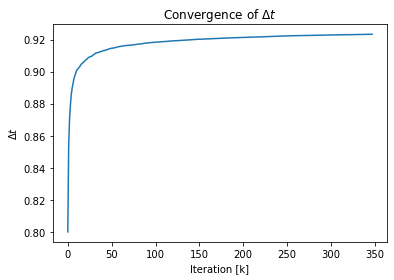

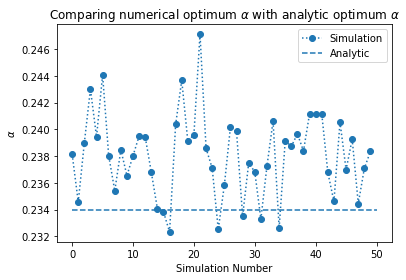

In [11]:
import numpy as np

# add code here

def rwmDT(x0, dt1, d, tol, metrics=False):
    
    """function to identify the value of \Delta T in the Random Walk Metropolis algorithm that achieves the desired acceptance probability"""
    """inputs are the initial state (x0), an initial estimate of \Delta T (dt1), the dimension (d), tolerance of numerical estimate (tol) and a boolean for whether to return how \Delta T changed over iterations (metrics)"""
    """returns the optimum value for \Delta T and the chain of \Delta Ts generated (if metrics=True)"""
    
    if metrics==True:                     # if we want to return how the \Delta Ts changed over time...
        deltaTs = [dt1]                   # ...create an empty list to store these values
    
    x = x0                                # load our initial condition x0 to array x
    dt = dt1                              # load our initial estimate for dt0 to dt
    
    a = np.ones(d)/np.sqrt(2*d)           # create the constant vector a, defined by a_j = 1/sqrt(2d)
    
    alpha = 0                             # our numerical estimate of the acceptance proposal
    optAlpha = 0.234                      # load the optimal acceptance probability for RWM
    
    xChain, alpha = rwm(x,dt,d,10000)     # run function above such that it returns chain after reaching the stationary distribution...
                                          # ...with this \delta t and the estimate for \alpha using this delta t
    x = xChain[-1]                        # new x to feed into next chain with updated \delta t is set to the last state in Markov chain
    
    k = 1                                 # iteration counter
    
    while np.abs(alpha-optAlpha) >= tol:  # loop this section until our estimate is sufficiently close to the optimum value of alpha
        
        dt = dt + dt*(alpha - optAlpha)/k # update the numerical estimate for \Delta T according to the formula above
        
        xChain, alpha = rwm(x,dt,d,10000) # compute \alpha(k) using this new estimate for \Delta t 
        x = xChain[-1]                    # set the initial condition for the next simulation as the last state in the previous Markov chain generated
        
        if metrics==True:                 # if we want to return how the \Delta Ts changed over time...
            deltaTs.append(dt)            # ...save the dt at this iteration
        
        k += 1                            # increment our iteration counter by 1
        #print(dt)
            
    if metrics==True:                     # if we want to return how the \Delta Ts changed over time...
        return dt, deltaTs                # ...return our numerical estimate for \delta T and all the \delta Ts
    else:                                 # else...
        return dt                         # ...just return our numerical estimate for \delta T

dt1,dts = rwmDT(np.random.rand(8), np.random.rand(1)[0], 8, 1e-4, True)   # return both optimum \delta T and how they converged for the first run so metrics=True
print("Optimum \Delta T : ", dt1)

plt.plot(dts)                             # plot how the \delta ts converged in the first run
plt.xlabel("Iteration [k]")               # set the x axis label
plt.ylabel("$\Delta t$")                  # set the y axis label
plt.title("Convergence of $\Delta t$")    # set a title
plt.show()                                # show the plot

"""Creating a plot to visualise if we found a good numerical estimate for the optimum \Delta t"""

alphatest = np.zeros(50)                  # will run 50 simulations to compute \alpha 50 times using my estimate for \Delta t

for i in range(50):                       # loop this 50 times
    alphatest[i] = rwm(np.random.rand(8), dt1, 8, 10000)[1]    # save \alpha computed using my estimate for \Delta t
    
plt.plot(alphatest, linestyle='dotted',marker="o", label="Simulation")
plt.hlines(0.234, 0, 50, linestyle='--', label="Analytic")
plt.xlabel("Simulation Number")
plt.ylabel("$\\alpha$")
plt.title("Comparing numerical optimum $\\alpha$ with analytic optimum $\\alpha$")
plt.legend()
plt.show()

Optimum \Delta T :  0.7161897447880184


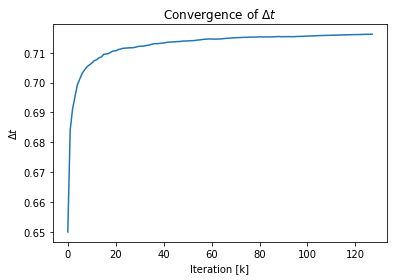

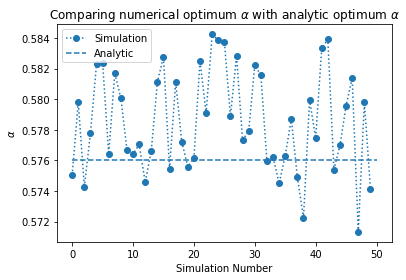

In [10]:
def malaDT(x0, dt1, d, tol, metrics=False):
    
    """function to identify the value of \Delta T in the Random Walk Metropolis algorithm that achieves the desired acceptance probability"""
    """inputs are the initial state (x0), an initial estimate of \Delta T (dt1), the dimension (d), tolerance of numerical estimate (tol) and a boolean for whether to return how \Delta T changed over iterations (metrics)"""
    """returns the optimum value for \Delta T and the chain of \Delta Ts generated (if metrics=True)"""
    
    if metrics==True:                     # if we want to return how the \Delta Ts changed over time...
        deltaTs = [dt1]                   # ...create an empty list to store these values
    
    x = x0                                # load our initial condition x0 to array x
    dt = dt1                              # load our initial estimate for dt0 to dt
    
    a = np.ones(d)/np.sqrt(2*d)           # create the constant vector a, defined by a_j = 1/sqrt(2d)
    alpha = 0                             # our numerical estimate of the acceptance proposal
    optAlpha = 0.576                      # load the optimal acceptance probability for MALA
    
    xChain, alpha = mala(x,dt,d,10000)    # run function above such that it returns chain after reaching the stationary distribution...
                                          # ...with this \delta t and the estimate for \alpha using this delta t
    x = xChain[-1]                        # new x to feed into next chain with updated \delta t is set to the last state in Markov chain
    
    k = 1                                 # iteration counter
    
    while np.abs(alpha-optAlpha) >= tol:  # loop this section until our estimate is sufficiently close to the optimum value of alpha
        
        dt = dt + dt*(alpha - optAlpha)/k # update the numerical estimate for \Delta T according to the formula above
        
        xChain, alpha = mala(x,dt,d,10000)# compute \alpha(k) using this new estimate for \Delta t 
        x = xChain[-1]                    # set the initial condition for the next simulation as the last state in the previous Markov chain generated
        
        if metrics==True:                 # if we want to return how the \Delta Ts changed over time...
            deltaTs.append(dt)            # ...save the dt at this iteration
        
        k += 1                            # increment our iteration counter by 1
        #print(dt)
            
    if metrics==True:                     # if we want to return how the \Delta Ts changed over time...
        return dt, deltaTs                # ...return our numerical estimate for \delta T and all the \delta Ts
    else:                                 # else...
        return dt                         # ...just return our numerical estimate for \delta T
    
dt2, dts2 = malaDT(np.random.rand(8), np.random.rand(1)[0], 8, 1e-4, True)   # return both optimum \delta T and how they converged for the first run so metrics=True
print("Optimum \Delta T : ", dt2)

plt.plot(dts2)                            # plot how the \delta ts converged in the first run
plt.xlabel("Iteration [k]")               # set the x axis label
plt.ylabel("$\Delta t$")                  # set the y axis label
plt.title("Convergence of $\Delta t$")    # set a title
plt.show()                                # show the plot

"""Creating a plot to visualise if we found a good numerical estimate for the optimum \Delta t"""

alphatest2 = np.zeros(50)                 # will run 50 simulations to compute \alpha 50 times using my estimate for \Delta t

for i in range(50):                       # loop this 50 times
    alphatest2[i] = mala(np.random.rand(8), dt2, 8, 10000)[1]    # save \alpha computed using my estimate for \Delta t
    
plt.plot(alphatest2, linestyle='dotted',marker="o", label="Simulation")
plt.hlines(0.576, 0, 50, linestyle="--", label="Analytic")
plt.xlabel("Simulation Number")
plt.ylabel("$\\alpha$")
plt.title("Comparing numerical optimum $\\alpha$ with analytic optimum $\\alpha$")
plt.legend()
plt.show()

*A quick summary of the results from this section*

RWM Optimum $\Delta t$ = 0.923

MALA Optimum $\Delta t$ = 0.72

For both the RWM algorithm and MALA, we see a good convergence of $\Delta t$. As there is still a slight upward trend in both convergence plots, I could probably set a smaller tolerance value in order to find a more accurate estimate for the optimum $\Delta t$. However, these estimate is more than good enough for what we wish to do in the next question. We also see that the extra 50 simulations are quite close to the analytic estimate for the optimum $\alpha$ for both algorithms, which confirms the results. 

### 1.6


Use the codes above to investigate the performance of the algorithms for $d = 8$. In particular, use the codes to compute a Monte Carlo estimate of $\textrm{E}(\|\textbf{X}\|_2^2)$ and show the evolution of your estimates as a function of the number of the number of iterations (Hint: for the considered model, $\textrm{E}(\|\textbf{X}\|_2^2) = 8.5$). What do you observe?




In [12]:
import numpy as np
import matplotlib.pyplot as plt

d = 8                     # dimension of Markov Chain
dtRWM = 0.923             # optimal step size to achieve desired acceptance probabilities
dtMALA = 0.72             # optimal step size to achieve desired acceptance probabilities
x0 = np.ones(d)           # initial condition for Markov Chain
m = 1000000               # number of Markov samples

RWMchain, RWMalpha = rwm(x0, dtRWM, d, m)          # generate Random Walk Metropolis Markov Chain   
MALAchain, MALAalpha = mala(x0, dtMALA, d, m)      # generate Metropolis Adjusted Langevin Algorithm Markov Chain

RWMexp = np.zeros(m)      # create empty list to store how expectation value estimate improves with more iterations for RMW
MALAexp = np.zeros(m)     # create empty list to store how expectation value estimate improves with more iterations for RMW

RWMexp[0] = np.linalg.norm(RWMchain[0])**2       # calculate the norm of the first entry of the Markov chain for RWM
MALAexp[0] = np.linalg.norm(MALAchain[0])**2     # calculate the norm of the first entry of the Markov chain for MALA

for i in range(1,m):                             # now loop over the rest of the Markov chains generated
    RWMexp[i] = (RWMexp[i-1]*i + np.linalg.norm(RWMchain[i])**2)/(i+1)       # compute the expectation value of the chain up to iteration m
    MALAexp[i] = (MALAexp[i-1]*i + np.linalg.norm(MALAchain[i])**2)/(i+1)    # a nice way to do this is to update the average based on the average at the last iteration

RWM Acceptance Probability =  0.2373768840772706
RWM Expectation Value =  8.491647209237964
MALA Acceptance Probability =  0.5756071305149724
MALA Expectation Value =  8.492360473979227


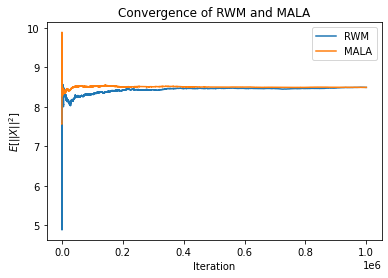

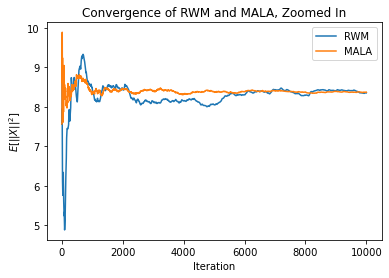

In [14]:
print("RWM Acceptance Probability = ", RWMalpha)   # check we recover the desired acceptance probability
print("RWM Expectation Value = ", RWMexp[-1])      # print final estimate for expectation value

print("MALA Acceptance Probability = ", MALAalpha) # check we recover the desired acceptance probability
print("MALA Expectation Value = ", MALAexp[-1])    # print final estimate for expectation value

plt.plot(RWMexp, label="RWM")                      # plot how the RWM expectation value converges
plt.plot(MALAexp, label="MALA")                    # plot how the MALA expectation value converges
plt.title("Convergence of RWM and MALA")           # create a title for the plot
plt.xlabel("Iteration")                            # set the label of the x axis
plt.ylabel("$E[||X||^2]$")                         # set the label of the y axis
plt.legend()                                       # create a legend
plt.show()                                         # show the plot

plt.plot(RWMexp[:10000], label="RWM")              # plot how the RWM expectation value converges
plt.plot(MALAexp[:10000], label="MALA")            # plot how the MALA expectation value converges
plt.title("Convergence of RWM and MALA, Zoomed In")# create a title for the plot
plt.xlabel("Iteration")                            # set the label of the x axis
plt.ylabel("$E[||X||^2]$")                         # set the label of the y axis
plt.legend()                                       # create a legend
plt.show()                                         # show the plot


*Add your discussion here*

Firstly, the estimate returned by the RWM algorithm after the full Markov chain of 1,000,000 iterations was very good. The RWM algorithm returned an estimate of 8.4916, which is very close to 8.5. From the graph above for the convergence of the algorithms, we see that the RWM algorithm takes quite long to converge to an answer. The curve for $\textrm{E}(\|\textbf{X}\|_2^2)$ as a function of iterates stabilises after approximately 8,000 iterations, which we can see from the second plot.

However, MALA returned a very good estimate for $\textrm{E}(\|\textbf{X}\|_2^2)$ after taking the numerical average for the full Markov chain of length 1,000,000 iterations. The analytic answer for $\textrm{E}(\|\textbf{X}\|_2^2)$ was 8.5 and MALA returned 8.4924. Furthermore, from the graph above, we see that MALA converged after approximately 2,000 iterations, which is considerably quicker than the RWM algorithm. This is to be expected as we incorporate gradient information about the probability distribution, $\pi$, in the MALA algorithm. This means we can move more quickly to areas where $\pi$ is increasing, so that we lose some randomness in our proposals for the Markov chain. This means that we will be able to sample from the distribution $\pi$ more effectively, so that this expectation value converges more quickly.

As a quick aside, I confirmed again that the code from the previous section returned good estimates for the value of $\Delta t$ which returns the optimum acceptance probability. This is because 0.237 is very close to 0.234 for RWM and 0.5756 is extremely close to 0.576 for MALA.  

# Question 2: Image inpaiting by sparse regularisation 

Image impainting methods seek to recover an uknown image $x \in \mathbb{R}^d$ from a partial and noisy observation $y \in \mathbb{R}^d$ that only contains (corrupted versions of) a subset of the pixels of $x$. We focus on linear inpainting problems of the form $y = \Phi (x + w)$ with $w \sim \mathcal{N}(0,\sigma^2 \mathbb{I}_n)$, and where the so-called masking operator $\Phi \in \mathbb{R}^{n \times n}$ is a diagonal with matrix with diagonal elements $\Phi_{i,i}=1$ when the i-th pixel $x_i$ is observed, and $\Phi_{i,i}=0$ $x_i$ is not observed.

Here we consider image inpainting by sparse regularisation. More precisely, we promote sparsity on a redundant wavelet frame $\Psi \in \mathbb{R}^{d \times p}$ (a wavelet frame is essentially a concatenation of wavelet bases). On this frame, the unknown image is represented by a vector of wavelet coefficients $a \in \mathbb{R}^p$, with $p >> d$. To map $a$ to the pixel domain we apply $x = \Psi a$.

To solve the inpainting problem we use the following estimator that promotes solutions that are sparse on $\Psi$:

$$
a^* = \textrm{argmin}_{a \in \mathbb{R}^p} \quad F_1(a) + F_2(a)\, ,
$$

where 
$$
F_1(a) = \frac{1}{2}\|y - \Phi \Psi a\|_2^2 \quad F_2(a) = \alpha \|a\|_1\, ,
$$

and where $\alpha > 0$ is a regularisation parameter (we use $\alpha = 0.01$). We report the solution on the pixel domain, i.e., $x^* = \Psi a^*$.

Notice that to represent $x$ on the frame we set $a = U \Psi^\star x$, where $\Psi^\star \in \mathbb{R}^{p \times d}$ is the adjoint of $\Psi$, and $U \in \mathbb{R}^{p \times p}$ is a matrix derived from $\Psi$ and $\Psi^\star$ whose role is to take into account the fact that $\Psi$ and $\Psi^\star$ do not form a pair of orthonormal matrices. This is useful, for example, for using $y$ to initialise optimisation algorithms to compute $a^*$ (i.e., we set $a_y = U \Psi^\star y$ as initial condition).


To implement the operators $\Phi$, $\Psi$, $\Psi^\star$, and $U$, we use the nt_toolbox library, available from https://github.com/gpeyre/numerical-tours/raw/master/python/nt_toolbox.zip (to use this library, download the .zip file and extract within your working directory from which you will run the notebook). The operators are defined as follows:

In [14]:
from __future__ import division
import numpy as np
import scipy as scp
import pylab as pyl
import matplotlib.pyplot as plt
from nt_toolbox.general import *
from nt_toolbox.signal import *
from nt_toolbox.perform_wavelet_transf import *
from numpy import random
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2


### Masking operator
# Operator setup
n = 128                                              # dimension (number of image pixels)
rho = .5                                             # proportion of unobserved pixels

Omega = np.zeros([n, n])
sel = random.permutation(n**2)
np.ravel(Omega)[sel[np.arange(int(rho*n**2))]] = 1

# Operator \Phi
Phi = lambda f, Omega: f*(1-Omega)


### Frame operators
# Operator setup
Jmax = np.log2(n)-1
Jmin = (Jmax-3)
J = Jmax-Jmin + 1
u = np.hstack(([4**(-J)], 4**(-np.floor(np.arange(J + 2./3,1,-1./3)))))
Xi = lambda a: perform_wavelet_transf(a, Jmin, -1, ti=1)   

# Operator \Psi, \Psi^\star, and U
U = np.transpose(np.tile(u, (n,n,1)),(2,0,1))                           # Operator U
Psi = lambda a: Xi(a/U)                                                 # Operator \Psi
PsiS = lambda f: perform_wavelet_transf(f, Jmin, + 1, ti=1)             # Operator \Psi^\star


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The code below generates the observation $y = \Phi (x + w)$, where $w \sim \mathcal{N}(0,\sigma^2 \mathbb{I}_n)$ with noise standard deviation $\sigma = 0.01$.

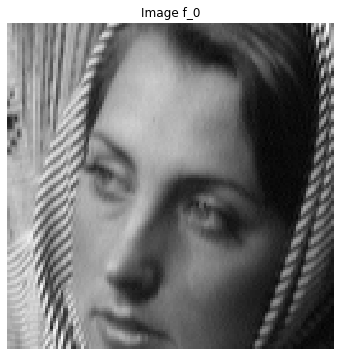

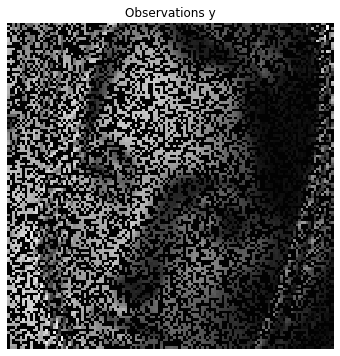

In [15]:
# Load the "barbara" image
f0 = load_image("barb128.bmp")

# Display original image
plt.figure(figsize = (6,6))
imageplot(f0, 'Image f_0')

# Generate noisy and partial observation 'y'
sigma = 0.01;
y = Phi(f0 + sigma*random.standard_normal(f0.shape), Omega);

# Display observation (unseen pixels are assigned value '0')
plt.figure(figsize = (6,6))
imageplot(y, 'Observations y')

# Compute representation of 'y' on wavelet frame \Psi
ay = U*PsiS(y)

### 2.1
The proximal-gradient algorithm is a standard proximal splitting technique to compute $a^*$ by using the gradient operator $\nabla F_1$ and the proximal operator $prox^\lambda_{F2}$, which are given by

$$
\nabla F_1 (a) = -\Psi^\star \Phi (y - \Phi \Psi a) \, ,
$$

and

$$
[prox^\lambda_{F2}(a)]_j = a_j \textrm{max}(0,1-\lambda\alpha/|a_j|) \quad \forall j = 1,\ldots,p \, ,
$$

In the code cell below, use the python operators $\Phi$, $\Psi$, and $\Psi^\star$ defined above by using the nt_toolbox library, to construct the operators $\nabla F_1$ and $\textrm{prox}^\lambda_{F_2}$.

In [46]:
### Gradient operator of F1

def gradF1(a):
    
    """returns the gradient of F1, evaluated at a"""
    
    arg = y - Phi(Psi(a),Omega)        # compute the argument that will be fed into \Psi^*\Phi
        
    return -PsiS(Phi(arg, Omega))       # return \Psi^*\Phi evaluated at the argument computed 

### Proximal operator of F2 (the soft thresholding operator)

def proxF2(a, lam):
    
    """returns the proximal operator for F2, evaluated at a, with constant lam"""
    
    arg = 1 - lam * 0.01 / np.abs(a)   # compute the argument in the max(0,arg) function. \alpha = 0.01 
    
    negativePos = arg < 0              # create an array of booleans, which are True where the argument above is less than 0
    arg[negativePos] = 0               # wherever the argument above is less than 0 (i.e. booleans in array are True)...
                                       # ...set the arg array to 0
    
    return a * arg                     # return a*arg (multiplied element-wise so we are left with an array)

### 2.2 
State the expression of the iterates of the *proximal-gradient algorithm* to compute $a^*$.

*Enter your solution here*

The proximal-gradient algorithm aims to find the minimiser $a^*$ of the function $F(a) = F_1(a) + F_2(a)$, where both $F_1 and F_2 \in \Gamma_0(\mathbb{R}^p)$ and $F_1$ is $\beta$-Lipschitz differentiable. The generic expression for the iterates of the proximal-algorithm algorithm is:

$$a^{(k+1)} = \text{prox}^{\lambda_p}_{F_2}\left(a^{(k)} - \lambda_p\nabla{F_1(a^{(k)})}\right)$$

where $\lambda_p$ is a step-size parameter. Note that if we set this parameter to a constant $\lambda \in (0,1/\beta)$, then this algorithm converges to the minimiser $a^*$ at a rate $\mathcal{O}(1/k)$. We can compute an explicit expression for these iterates by subbing in our expressions for $\nabla F_1$ and $\textrm{prox}^\lambda_{F_2}$:

\begin{align}
    (a^{(k+1)})_j &= \left(\text{prox}^{\lambda}_{F_2}\left(a^{(k)} + \lambda \Psi^\star \Phi (y - \Phi \Psi a^{(k)}) \right)\right)_j \\
    &= \left(a^{(k)} + \lambda \Psi^\star \Phi (y - \Phi \Psi a^{(k)}) \right)_j \max\left(0, 1 - \frac{\lambda\alpha}{\left|\left(a^{(k)} + \lambda \Psi^\star \Phi (y - \Phi \Psi a^{(k)}) \right)_j\right|}   \right)
\end{align}

### 2.3

In the code cell below, implement the proximal gradient algorithm to compute $a^*$ in the form of a function that takes as input: an initial condition $a_{0}$, a step size $\delta$, and a number of iterations $T$, while it outputs the final iterate $a_T$ and the sequence of function values $F(a_t) = F_1(a_t) + F_2(a_t)$ for $t = 1,\ldots,T$. 



In [59]:
def F1(a):
    
    """returns the function F1, evaluated at a"""
    
    arg = y - Phi(Psi(a),Omega)             # compute the object within the norm of the definition of F_1(a)
    
    return 0.5 * np.linalg.norm(arg)**2     # take the square of the norm of the object computed and divide by 2

def F2(a):
    
    """returns the function F2, evaluated at a"""
    
    return 0.01 * np.sum(np.abs(a))         # take the L^1 norm of a, and scale by \alpha = 0.01

def F(a):
    
    """returns the function F = F1 + F2, evaluated at a"""
    
    return F1(a) + F2(a)                    # return F(a) = F_1(a) + F_2(a)

def proxGrad(a0, delta, T):
    
    """implements the proximal gradient algorithm to compute the optimum a"""
    """inputs are an initial condition (a0), a step size (delta) and a number of iterations (T)"""
    """returns the final iterate (aT) and the sequence of F(at)"""
    
    sequence = np.zeros(T+1)                # create an empty list to store all the values of F(a)
    sequence[0] = F(a0)                     # enter the initial value of F(a) using the initial condition a = a0
    
    a = a0                                  # load the initial condition for the a
    
    for i in range(1,T+1):                  # loop T times to generate T iterations
        
        arg = a - delta * gradF1(a)         # compute the object that will be fed into prox operator in prox-grad alg.
        a = proxF2(arg, delta)              # compute the next iteration in the prox-grad alg.
        
        sequence[i] = F(a)                  # compute F(a) at this iteration of a and save in the array
        
    return a, sequence                      # return the final iteration of a = a^* and the sequence of values of F(a)

### 2.4

Use the code above to compute the solution $x^*$. We recommend using as initial condition $a_y$ and at least $T > 10^4$ iterations. Present any scripts and numerical tests that you run in the code cell below. Any output you use in your discussion should be displayed and easily interpretable.

Hint: To set the step size $\delta$, use the fact the gradient $\nabla F_1$ is $\beta$-Lipschitz continuous with constant $\beta = 4^4$. If the algorithm is correctly implemented and converging, you will observe that $F(a_t)$ decreases monotonically.

In [129]:
# add your code here

aS, Fs = proxGrad(ay, 0.99/(4**4), 50000)       # use the proximal-gradient algorithm to find a^* and how F(a) evolves over time

xS = Psi(aS)           # compute x^* from the optimum wavelet coefficients a^*

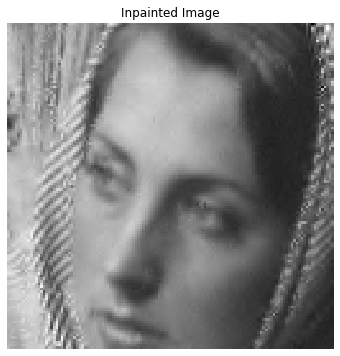

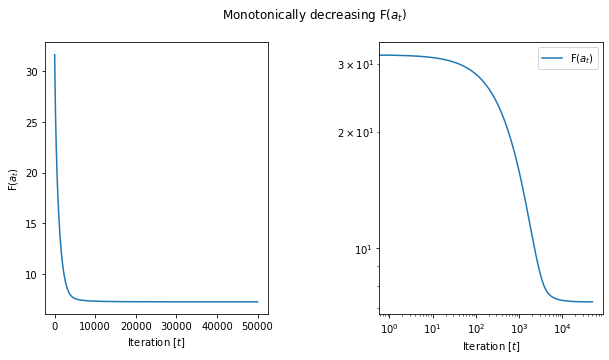

Fit =  [ 7.26939468 64.94278875]


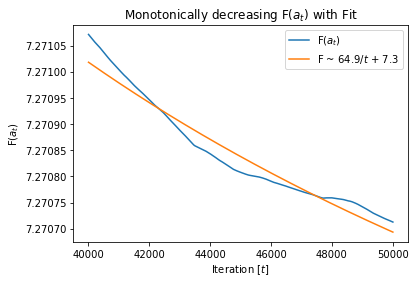

In [132]:
# add your code here

# Display the inpainted image
plt.figure(figsize = (6,6))         # create figure to show the image
imageplot(xS, 'Inpainted Image')    # display x^* with a nice title 
plt.show()                          # show the image

fig, axs = plt.subplots(1,2, figsize=(10,5))   # create a figure with 2 subplots to show both standard and log-log graphs

axs[0].plot(Fs, label="F($a_t$)")       # standard plot of F(a_t) as a function of iterates t
axs[0].set_xlabel('Iteration [$t$]')    # set the x axis label
axs[0].set_ylabel('F($a_t$)')           # set the y axis label

axs[1].loglog(Fs, label="F($a_t$)")     # loglog plot of F(a_t) as a function of iterates t
axs[1].set_xlabel('Iteration [$t$]')    # set the x axis label - no need to label the y axis for this plot

fig.suptitle('Monotonically decreasing F($a_t$)')    # title for both graphs
plt.subplots_adjust(wspace=0.5)         # edit figure so there is more space between the graphs
plt.legend()                            # create a legend 
plt.show()                              # show the figure

fit = np.polyfit(np.arange(40001,50002,1), Fs[40000:]*np.arange(40001,50002,1), deg=1)   # linear fit to F(a_t) times t for large t

print("Fit = ", fit)                    # print the fit

plt.plot(np.arange(40001,50002,1), Fs[40000:], label="F($a_t$)")    # plot the F(a_t) as function of iterates for large t
plt.plot(np.arange(40001,50002,1), fit[1]/np.arange(40001,50002,1) + fit[0], label="F ~ "+str(np.round(fit[1],1))+"/$t$ + "+str(np.round(fit[0],1)))  # use the correct coefficients to generate fit for a + b/t
plt.xlabel('Iteration [$t$]')           # set the x axis label
plt.ylabel('F($a_t$)')                  # set the y axis label
plt.title('Monotonically decreasing F($a_t$) with Fit')    # create a title for the figure
plt.legend()                            # create a legend
plt.show()                              # show the figure

*Add your discussion here*

As the gradient $\nabla F_1$ is $\beta$-Lipschitz continuous with constant $\beta = 4^4$, we set the step-size equal to $\frac{0.99}{\beta} = \frac{0.99}{4^4}$. If we set the step-size greater than $\frac{1}{\beta}$ then in theory, the proximal-gradient algorithm would not converge to find the minimiser $a^*$ with rate $\mathcal{O}(1/t)$. 

Firstly, as a visual confirmation that the code is working, I plotted the image $x^* = \Psi a^*$. This inpainted image has filled in all of the missing pixels of the corrupted image and resembles the original image very closely. Thus, the noisy and missing points of the corrupted image have been smoothed over by the proximal-gradient algorithm. 

We can also do some analysis on the function $F(a_t)$ of which we are trying to find the minimiser $a^*$. As we have set the step-size to be $\frac{0.99}{\beta}$, we would expect $F(a_t)$ to monotonically decrease with $t$. Thus, we plot $F(a_t)$ as a function of the iterations, $t$, to show this. It is not very easy to see that $F(a_t)$ is monotonically decreasing from a standard plot (left) for large $t$ so I plotted this on a log-log graph too (right). With the help of both of these graphs (and the final graph for just the last 10,000 iterations), we see that $F(a_t)$ is monotonically decreasing for both large and small $t$. 

We also know that $F(a_t)$ decreases monotonically decreases with rate $\mathcal{O}(1/t)$. This means that the rate truely goes like $a + \frac{b}{t} + \frac{c}{t^2} + \frac{d}{t^3} + \dots$. I want to try to find the function $a+\frac{b}{t}$ to $F(a_t)$ as a function of the iterations, $t$, ie $$F(a_t) = a+\frac{b}{t}$$ However, in order to damp out the effect of the lower order terms, $\frac{c}{t^2} + \frac{d}{t^3} + \dots$, I only fit this function for large $t$. The way I achieved this in the code was to actually fit a linear polynomial to $F(a_t)\times t = a\times t + b$, and then extracting the coefficients $a$ and $b$ from this fit. I did not expect to find a perfect fit as it is difficult to damp out the effect of all the lower order terms, but I hoped to find a close fit to show that the leading order term is $\mathcal{O}\frac{1}{t}$. From the final graph, which shows this fit for the final 10,000 iterations of the proximal-gradient algorithm (after 40,000 iterations so that the lower order terms are damped out), we see that the fit of $\mathcal{O}(1/t)$ works quite well to capture the overall decrease of $F(a_t)$. 